In [1]:
import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.arima import arima_string
from src.models.statsforecast.models import get_auto_statsmodels
from src.dataset.data_preparation import prepare_data
from config.base import HORIZON, TEST_LENGTH_MULTIPLIER

# Get data
train_df, test_df, hist_exog = prepare_data(horizon=HORIZON, test_length_multiplier=TEST_LENGTH_MULTIPLIER)


# Get models
models = get_auto_statsmodels(HORIZON)

print(models)

# Instantiate StatsForecast
sf = StatsForecast(
    models=models,
    freq='D',
    n_jobs=-1,
    verbose=True
)

forecasts_df = sf.forecast(df=train_df[['unique_id', 'ds', 'y']], X_df=test_df[['unique_id', 'ds']], h=HORIZON * TEST_LENGTH_MULTIPLIER)

print(forecasts_df.head())

Loading and preparing data...
Forecast horizon (h) set to: 7 days

Total data shape: (2922, 80)
Train set shape: (2887, 80)
Test set shape: (35, 80)
  Train set covers: 2017-01-01 00:00:00 to 2024-11-26 00:00:00
  Test set covers: 2024-11-27 00:00:00 to 2024-12-31 00:00:00
[AutoARIMA, AutoETS, CES, Naive]


Forecast:   0%|          | 0/1 [00:00<?, ?it/s]

  unique_id         ds     AutoARIMA       AutoETS           CES        Naive
0   Bitcoin 2024-11-27  91833.563350  92047.445074  92495.843750  91985.32031
1   Bitcoin 2024-11-28  91586.764140  92063.955177  92578.757812  91985.32031
2   Bitcoin 2024-11-29  91680.436343  92080.465279  92654.921875  91985.32031
3   Bitcoin 2024-11-30  91718.036970  92096.975381  92736.609375  91985.32031
4   Bitcoin 2024-12-01  91687.569224  92113.485484  92814.000000  91985.32031


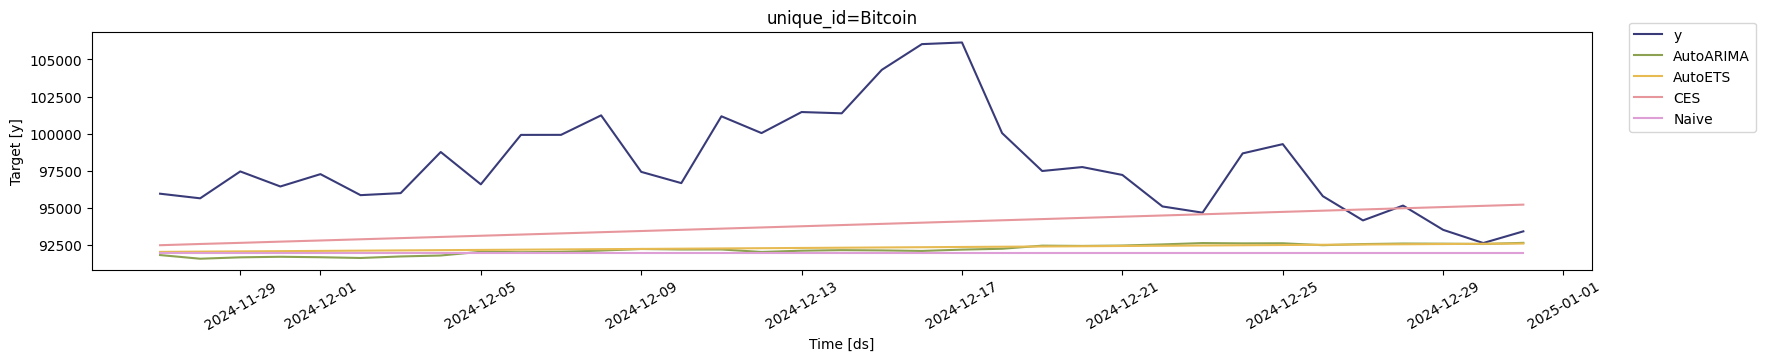

In [3]:
fig = sf.plot(test_df, forecasts_df, models=["AutoARIMA", "AutoETS", "CES", "Naive"])

fig.savefig("test.png")